# Introducción a Machine Learning y NLP

## Conceptos

**Artificial Intelligence (IA)** comprende el estudio de diseño de sistemas, de tal forma que puedan imitar el comportamiento humano.

**Machine Learning (ML)** es una rama, un subconjunto, de la IA que se concentra principalmente en el diseño de sistemas, permitiendo a los mismos aprender y realizar predicciones basadas en cierta experiencia previa.

**Natural Lenguage Processing (NLP)** consiste en el pre-procesamiento de texto que incluye la normalización del mismo, la "limpieza" de datos inservibles para la máquina y la "tokenización" del resultado de los procesos anteriores. Ejemplos claros de la vida cotidiana son los sistemas de clasificación de spam en correos.

## Machine Learning

### Tipos

* **Supervised Learning:** Hay un supervisor dentro de un algoritmo que procesa información de entrada de un data set predefinido (entrenado) para saber que es y que no es generar un modelo entrenado. Cuando diferentes datos de entrada llegan, la "máquina" compara el modelo con la nueva entrada y predice el resultado. Datos etiquetados. Ejemplo: Cortana.
    * Algoritmos:
        * Linear Regression.
        * Random Forest.
        * Support Vector Machines.
* **Unsupervised Learning:** No hay un data set entrenado. La entrada se compara con el modelo entrenado, procesa la misma y categoriza la entrada como resultado. Busca saber más de los datos mediante una entrada, pero no hay una variable de salida a diferencia del supervisado. Datos no etiquetados.
* **Reinforcement Learning:** Determina qué acciones debe escoger un agente de software en un entorno dado con el fin de maximizar alguna noción de "recompensa" o premio acumulado. 
     

## Natural Lenguage Processing

Como se mencionó en la sección de "Conceptos" el Procesamiento del Lenguaje Natural de un texto consiste en normalizar, limpiar y __tokenizar__ un data set para que la máquina pueda interpretarlo y realizar con el resultado la toma de decisiones. El token más común para una entrada de texto es una _palabra_.

### Pasos NLP

1. Plantear una pregunta que sirva como base para capturar datos.
2. Obtener datos de fuentes específicas y bajo métodos específicos.
3. Limpiar los datos obtenidos, pasando todo a minúscula y eliminando puntuaciones y números, entre otros.
4. Obtener **Corpus** (clave - texto limpio) / **Document-Term Matrix** (clave - contador de palabras) para aplicar tecnicas de ML.

### Ambiente de Desarrollo, Tecnologías y Plataforma

Utilizamos Anaconda, plataforma de codigo abierto de Python que contiene ciertas librerías populares para data science. Para realizar la mayoría de las pruebas utilizaremos Jupyter Notebook, IDE que se encuentra dentro de la plataforma de Anaconda, el cual permite integrar código a nuestras explicaciones, compilar y ejecutar el mismo para obtener resultados.

#### Consideramos los pasos nombrados de NLP:

* Obtener datos de fuentes específicas y almacenarlos. Las librerías investigadas que sirven de utilidad para realizar este paso son las siguientes:
    * Extraer datos de una web: **Beautiful Soup**.
    * Obtener datos mediante llamadas HTTP. **requests**.
    * Guardar datos para uso posterior: **pickle**.
    * Representar datos y manipularlos: **pandas**.
* Normalizar y limpiar los datos obtenidos: **re**.
* Organizar los datos. Corpus vs Document-Term Matrix: **scikit-learn y Count Vectorizer**.

### Desarrollo NLP Genérico

#### 1) Plantear una pregunta

_¿Qué hace que el comediante "Bo Burnham" destaque tanto?_

__2) Obtener datos relevantes de fuentes específicas__

Para contestar esta pregunta, debemos obtener datos relativos a la comediante implicada y otros comediantes. Nos basaremos en la página https://scrapsfromtheloft.com. La misma contiene copias de stand ups de diferentes comediantes, entre ellos Bo Burnham.

_Referenciaremos las siguientes URL para los distintos comediantes seleccionados:_
* Ali wong: http://scrapsfromtheloft.com/2017/09/19/ali-wong-baby-cobra-2016-full-transcript/
* Louis C.K: http://scrapsfromtheloft.com/2017/05/06/louis-ck-oh-my-god-full-transcript/
* Ricky Gervais: http://scrapsfromtheloft.com/2018/03/15/ricky-gervais-humanity-transcript/
* Anthony Jeselnik: http://scrapsfromtheloft.com/2017/08/03/anthony-jeselnik-thoughts-prayers-2015-full-transcript/
* John Mulaney: http://scrapsfromtheloft.com/2017/08/02/john-mulaney-comeback-kid-2015-full-transcript/
* Mike Birbiglia: http://scrapsfromtheloft.com/2018/03/03/mike-birbiglia-my-girlfriends-boyfriend-2013-full-transcript/
* Ricky Gervais: http://scrapsfromtheloft.com/2018/03/15/ricky-gervais-humanity-transcript/
* Hasan Minhaj: http://scrapsfromtheloft.com/2017/10/21/hasan-minhaj-homecoming-king-2017-full-transcript/
* Jim Jefferies: http://scrapsfromtheloft.com/2017/04/21/jim-jefferies-bare-2014-full-transcript/
* Bo Burnham: http://scrapsfromtheloft.com/2017/08/07/bo-burnham-2013-full-transcript/

Cada una de estas páginas posee una particularidad: el código de cada una tiene cierta estructura, la cual permite obtener datos de la misma manera.

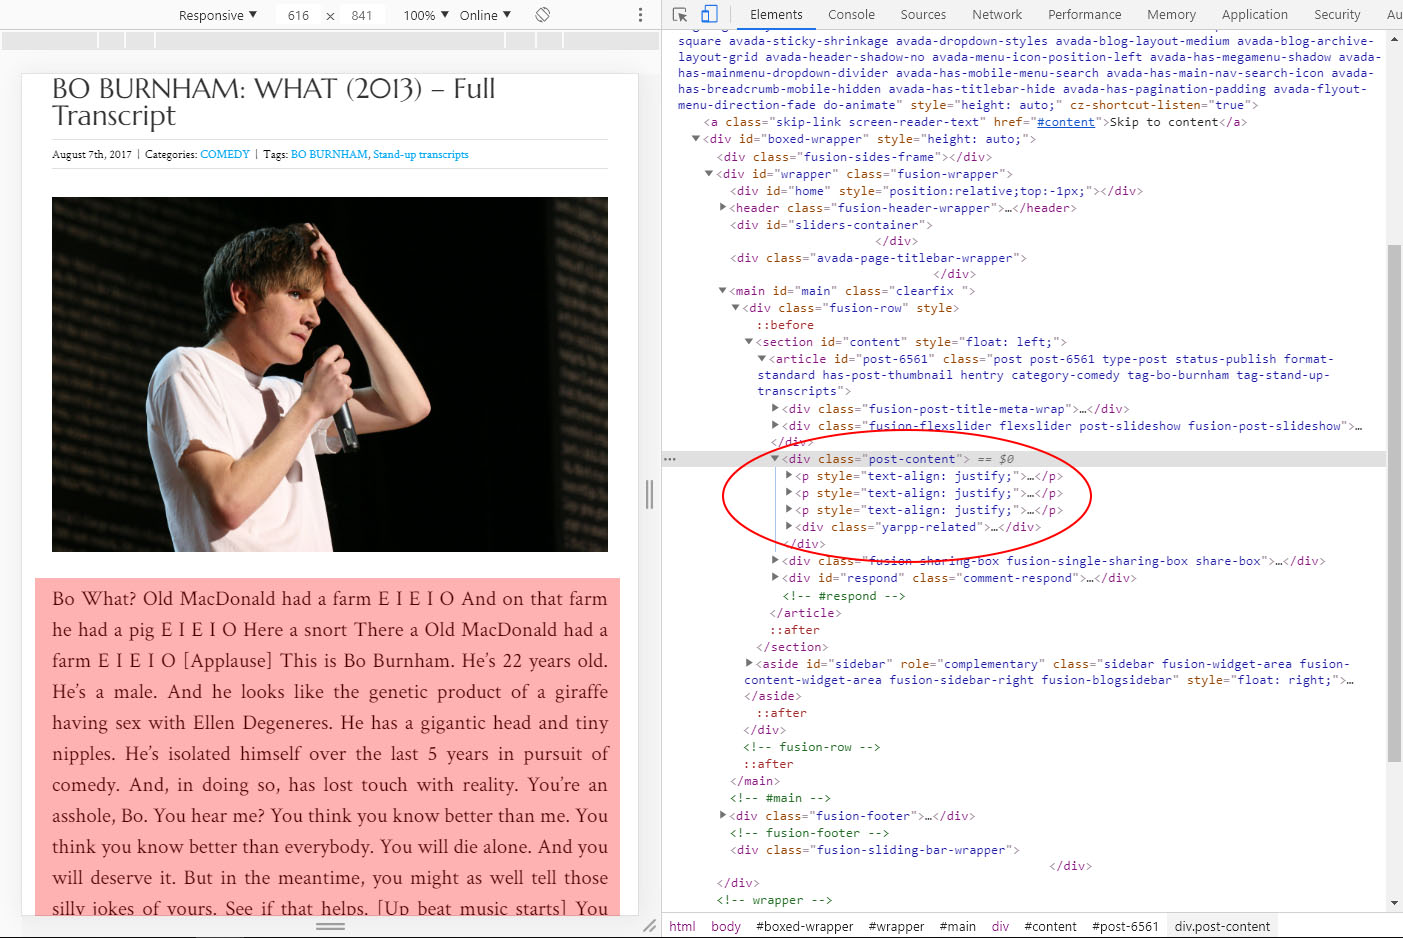

La idea es obtener todos los parrafos contenidos en el contenedor con clase "post-content" para cada URL, formando en primera instancia un diccionario donde la clave sea el comediante y el valor sea una lista de parrafos. 

In [ ]:
import requests
from bs4 import BeautifulSoup
import pickle

# Copia todos los parrafos contenidos en el contenedor div.post-content para la url que recibe
# como parámetro.
def url_to_transcript(url):
    page = requests.get(url).text
    # BeautifulSoup nos permite acceder al contenido de la url recibida por parámetro.
    soup = BeautifulSoup(page, "lxml")
    text = [p.text for p in soup.find(class_="post-content").find_all('p')]
    print('LOADED --> ' + url)
    return text

# URLs implicadas
urls = ['http://scrapsfromtheloft.com/2017/05/06/louis-ck-oh-my-god-full-transcript/',
        'http://scrapsfromtheloft.com/2018/03/15/ricky-gervais-humanity-transcript/',
        'http://scrapsfromtheloft.com/2017/08/07/bo-burnham-2013-full-transcript/',
        'http://scrapsfromtheloft.com/2017/05/24/bill-burr-im-sorry-feel-way-2014-full-transcript/',
        'http://scrapsfromtheloft.com/2017/04/21/jim-jefferies-bare-2014-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/02/john-mulaney-comeback-kid-2015-full-transcript/',
        'http://scrapsfromtheloft.com/2017/10/21/hasan-minhaj-homecoming-king-2017-full-transcript/',
        'http://scrapsfromtheloft.com/2017/09/19/ali-wong-baby-cobra-2016-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/03/anthony-jeselnik-thoughts-prayers-2015-full-transcript/',
        'http://scrapsfromtheloft.com/2018/03/03/mike-birbiglia-my-girlfriends-boyfriend-2013-full-transcript/']

# Comediantes
comedians = ['Louis', 'Ricky', 'Bo', 'Bill', 'Jim', 'John', 'Hasan', 'Ali', 'Anthony', 'Mike']

# Obtenemos los parrafos para cada url y los almacenamos en un arreglo
transcripts = [url_to_transcript(u) for u in urls]

# Haciendo uso de Pickle, creamos una carpeta "transcripts" donde haya un archivo .txt 
# por cada comediante.
# "wb" -> write
!mkdir transcripts

for i, c in enumerate(comedians):
     with open("transcripts/" + c + ".txt", "wb") as file:
         pickle.dump(transcripts[i], file)

In [ ]:
# Obtenemos los datos guardados previamente
# "rb" -> read
data = {}
for i, c in enumerate(comedians):
    with open("transcripts/" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)

In [ ]:
data.keys()

In [ ]:
data.items()

In [ ]:
# Cambiamos la estructura a un diccionario, donde la clave sea el comediante y el valor sea 
# el texto entero, crudo.
# Primero combinamos todos los párrafos en una cadena de texto única para cada comediante.

# Formato:
# {
# 'clave' : [valor]
# }

def combine_text(list_of_text):
    combined_text = ' '.join(list_of_text)
    return combined_text

data_combined = {
    key: [combine_text(value)] for (key, value) in data.items()
}

#data_combined

In [ ]:
# Podemos representar estos datos visualmente en una tabla. Para ello importaremos pandas, librería
# que nos permite manipular datos y analizar los mismos
import pandas as pd
pd.set_option('max_colwidth',120)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()

data_df

__3) Limpiar los datos__

En esta etapa debemos pasar todo el contenido a minúscula y eliminar todos los signos de puntuación y números. Para realizar esto, utilizaremos la librería "re".

In [ ]:
import re
import string 

def clean_text_punctuation1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    return text
    
clean_1 = lambda x: clean_text_punctuation1(x)

# A toda la columna de "transcript" le aplicamos la función definida y observamos el resultado
new_data = pd.DataFrame(data_df.transcript.apply(clean_1))
new_data

Si ejecutamos el código anterior veremos que aún hay signos de puntuación que no han sido eliminados. Pasamos otra ronda de eliminación de puntuación.

In [ ]:
def clean_text_punctuation2(text):
    # Comillas
    text = re.sub('[‘’“”…]', '', text)
    # Saltos de linea
    text = re.sub('\n', '', text)
    return text

clean_2 = lambda x: clean_text_punctuation2(x)

# Notar que la función se aplica sobre el resultado anterior
new_data = pd.DataFrame(new_data.transcript.apply(clean_2))
new_data

Habiendo eliminado los signos de puntuación, procedemos a eliminar todas aquellas palabras que contengan números.

In [ ]:
def clean_numbers(text):
    text = re.sub('\w*\d\w*', '', text)
    return text

clean_3 = lambda x: clean_numbers(x)

new_data = pd.DataFrame(new_data.transcript.apply(clean_3))
new_data

__4) Organizar los datos__

El objetivo de esta etapa es representar los datos mediante un Corpus (colección de texto) y una Document-Term Matrix (contador de palabras en formato de matriz).
Primero realizaremos el proceso para los datos "sucios" y luego para loos datos "limpios"

_Corpus_

In [ ]:
# Añadimos una columna con los nombres completos
full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham',  'Hasan Minhaj', 'Jim Jefferies', 
              'John Mulaney','Louis C.K','Mike Birbiglia' ,'Ricky Gervais']

data_df['full_name'] = full_names
data_df

In [ ]:
# Guardamos el Corpus para uso posterior
data_df.to_pickle("corpus.pkl")

_Document-Term Matrix_

In [ ]:
# Importamos CountVectorizer para crear la matriz objetivo. Además, eliminamos todas las palabras
# que corresponden a conexiones ("stop words")
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(new_data.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = new_data.index

data_dtm

In [ ]:
# Guardamos el DTM para uso posterior
data_dtm.to_pickle("dtm.pkl")

Guardamos en formato .pkl nuestros datos limpios

In [ ]:
new_data.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))

## Análisis Exploratorio de Datos

Una vez obtenidos los datos necesarios y haber sido limpiados, nos queda analizar si realmente estos datos obtenidos tienen sentido antes de realizar cualquier algoritmo. Como resultado final, deberíamos obtener una idea sobre a donde se dirige la respuesta a nuestra pregunta planteada.

__Exploratory Data Analysis__ se refiere al proceso crítico de mejora de investigaciones en datos con el fin de descubrir patrones, anomalías, resolver hipótesis y resolver supuestos con ayuda de estadísitcas y gráficos.

Cuando trabajamos con datos numericos, algunas de las técnicas son: encontrar un promedio de valores en el data set, una distribución de datos específica, los valores más comunes, etc. 

Siguiendo el ejemplo anterior, replicaremos esta idea para nuestros datos textuales:
1. Encontrar las __palabras más comunes__.
2. Tamaño del vocabulario: Ver el número de __palabras únicas__ pronunciadas por cada comediante.
3. Para nuestro caso, analizar cuantas __"malas palabras"__ pronuncia cada comediante.

Librerías útiles:
* _WordCloud:_ Para realizar wordclouds en python.
* _matplotlib:_ Para visualizar datos en python.

### Palabras más comunes

In [ ]:
# Leemos la matriz generada DTM
import pandas as pd

data = pd.read_pickle('dtm.pkl')

# Realizamos la transpuesta de la matriz para poder analizar las palabras por cada comediante
data = data.transpose()
data

In [ ]:
# Trataremos de buscar las primeras 20 palabras más comunes pronunciadas por cada comediante
# Para realizar esto, ordenaremos los valores para cada palabra de forma descendente y tomaremos
# las primeras 20 palabras

top_twenty = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(20)
    top_twenty[c]= list(zip(top.index, top.values))

In [ ]:
top_twenty

Si observamos con detalle el resultado anterior, hay palabras que pueden que no tengan mucho sentido para nuestro análisis según la escasa repetición de las mismas entre los comediantes. Por lo tanto, para solventar esto buscaremos todas las palabras mas comunes que pronuncian los comediantes y nos quedaremos solo con una parte, las cuales realmente se pronuncian con mas frecuencia entre cada rutina.

In [ ]:
data.columns

In [ ]:
from collections import Counter

# Obtenemos en una lista las 20 palabras más pronunciadas entre todos los comediantes.
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_twenty[comedian]]
    for t in top:
        words.append(t)
        
words

In [ ]:
# Identificamos las palabras más comunes
Counter(words).most_common()

In [ ]:
# La idea es eliminar las que superan en cantidad la mitad (para poder evaluar las palabras "más unicas")
new_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
new_stop_words

In [ ]:
# Actualizamos nuestra DTM
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

data_clean = pd.read_pickle('data_clean.pkl')

# Agregamos nuestras nuevas "stop words"
stop_words = text.ENGLISH_STOP_WORDS.union(new_stop_words)

# Creamos nuevamente DTM
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

data_stop.index

In [ ]:
# Creamos nuevo archivo DTM con el "filtro" realizado
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

Representamos los datos obtenidos mediante "word clouds". Estas nubes de palabras resaltan las palabras más pronunciadas y permiten comparar mejor visualmente los resultados. Para ello debemos tener instalada la librería correspondiente: "__WordCloud__" y "__Pyplot__" para poder graficarlas.

In [ ]:
from wordcloud import WordCloud

wc_result = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

In [ ]:
import matplotlib.pyplot as plt

full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham',  'Hasan Minhaj', 'Jim Jefferies', 
              'John Mulaney','Louis C.K','Mike Birbiglia' ,'Ricky Gervais']

plt.rcParams['figure.figsize'] = [16, 6]

# Creamos un gráfico por cada comediante
for index, comedian in enumerate(data.columns):
    wc_result.generate(data_clean.transcript[comedian])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc_result, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

#### Conclusión ####
* Bo Burnham habla muchas veces del amor. Lo cual puede que a muchos oyentes los atraiga.
* Muchos comediantes hablan mucho sobre lo que otras personas dijeron.

### Número de Palabras ###

In [ ]:
# Identificamos aquellas palabras que aparecen al menos una vez
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)
    

# Creamos una nueva tabla que contenga las palabras únicas (>0) por cada comediante
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

In [ ]:
# Grafiquemos nuestro resultado con "Numpy"
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.tight_layout()
plt.show()

#### Conclusión ####
* Ricky Gervais y Bill Burr son los comediantes que utilizan más palabras en sus shows de stand up.
* Louis C.K y Anthony Jeselnik usan menos vocabulario.

### Cantidad de "Malas palabras"

In [ ]:
# Obtenemos la cantidad de malas palabras pronunciadas por cada comediante
bad_words = data.transpose()[['fucking', 'fuck', 'shit']]
bad_words

In [ ]:
# Unimos 'Fucking' y 'Fuck' en una misma columna y realizamos los calculos.
data_profanity = pd.concat([bad_words.fucking + bad_words.fuck, bad_words.shit], axis=1)
data_profanity.columns = ['fuck_word', 'shit_word']
data_profanity

In [ ]:
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.fuck_word.loc[comedian]
    y = data_profanity.shit_word.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 155) 
    
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of FUCK!', fontsize=15)
plt.ylabel('Number of SHIT!', fontsize=15)

plt.show()

#### Conclusión ####
* Bill burr es el que más malas palabras pronuncia en sus shows. Jim Jefferies, usa exageradamente la palabra "fuck".
* Mike birbiglia es quien transmite un humor más "sano".

## Análisis del Sentimiento

Todo el análisis realizado hasta recién fue completamente genérico. También ese análisis puede ser aplicado a datos numéticos. Cuando la entrada es una cadena de texto, existen distintas técnicas populares para ralizar al principio. Entre ellas __Sentiment Análisis__.

Para este módulo, utilizaremos la librería de __textblob__, la cual nos predefine según ciertas palabras etiquetadas, un análisis promedio del sentimiento según los conceptos de __polaridad__ (Qué tan positiva o negativa es la palabra. [-1 ... +1]) y __subjetividad__ (Qué tan subjetiva es la palabra [0 ... +1] donde 0 es muy objetiva).

In [ ]:
from textblob import TextBlob

TextBlob("not a very great calculation").sentiment
## Sentiment(polarity=-0.3076923076923077, subjectivity=0.5769230769230769)
## Muy negativa y un poco subjetiva

Volvamos a nuestro ejemplo anterior. Analizaremos como es el análisis de sentimiento para la rutina de cada comediante (estáticamente).

In [ ]:
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

In [ ]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

In [ ]:
# Graficamos los resultados
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('Polaridad: -1 ........... +1', fontsize=15)
plt.ylabel('Subjetividad: 0 ........... +1', fontsize=15)

plt.show()

#### Conclusión ####
* Los resultados son bastante subjetivos.
* La rutina de Bill Burr es la que menos le gusta a la gente promedio.
* Las rutinas de Ali Wong, John Mulaney y Hasan Minhaj son las que más le gustan a la gente promedio y las más objetivas, por lo tanto podemos considerar esta observación como más certera. 

## Referencias

* https://www.anaconda.com/
* https://www.crummy.com/software/BeautifulSoup/bs4/doc/
* https://docs.python.org/3/library/pickle.html
* https://www.geeksforgeeks.org/python-pandas-dataframe/
* https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html
* https://www.datacamp.com/community/tutorials/wordcloud-python
* https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.html
* https://www.tutorialspoint.com/python/python_reg_expressions.htm
* https://planspace.org/20150607-textblob_sentiment/